# 1DTFIM - Convergence curves

This notebook is part of the work arXiv:2505.22083 (https://arxiv.org/abs/2505.22083), "Hyperbolic recurrent neural network as the first type of non-Euclidean neural quantum state ansatz". Code written by HLD. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
#sys.path.append('../../utility')
#from hyprnn_wf import *
#from tfim_hyprnn_train_loop import *


In [3]:
Ee_20 = -25.107797
Ee_40 = -50.569434
Ee_80 = -101.49741
Ee_100 =-126.96188

#N20
mE_egru = np.load('../results/N20_EuclGRU_50_ns50_meanE.npy')
mE_ernn = np.load('../results/N20_EuclRNN_50_ns50_meanE.npy')
mE_hgru = np.load('../results/N20_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_hrnn = np.load('../results/N20_HypRNN_50_hyp_id_ns50_meanE.npy')

vE_egru = np.load('../results/N20_EuclGRU_50_ns50_varE.npy')
vE_ernn = np.load('../results/N20_EuclRNN_50_ns50_varE.npy')
vE_hgru = np.load('../results/N20_HypGRU_50_hyp_id_ns50_varE.npy')
vE_hrnn = np.load('../results/N20_HypRNN_50_hyp_id_ns50_varE.npy')


#N40
mE_egru40 = np.load('../results/N40_EuclGRU_50_ns50_meanE.npy')
mE_ernn40 = np.load('../results/N40_EuclRNN_50_ns50_meanE.npy')
mE_hgru40 = np.load('../results/N40_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_hrnn40 = np.load('../results/N40_HypRNN_50_hyp_id_ns50_meanE.npy')

vE_egru40 = np.load('../results/N40_EuclGRU_50_ns50_varE.npy')
vE_ernn40 = np.load('../results/N40_EuclRNN_50_ns50_varE.npy')
vE_hgru40 = np.load('../results/N40_HypGRU_50_hyp_id_ns50_varE.npy')
vE_hrnn40 = np.load('../results/N40_HypRNN_50_hyp_id_ns50_varE.npy')

#N80
mE_egru80 = np.load('../results/N80_EuclGRU_50_ns50_meanE.npy')
mE_ernn80 = np.load('../results/N80_EuclRNN_50_ns50_meanE.npy')
mE_hgru80 = np.load('../results/N80_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_hrnn80 = np.load('../results/N80_HypRNN_50_hyp_id_ns50_meanE.npy')

vE_egru80 = np.load('../results/N80_EuclGRU_50_ns50_varE.npy')
vE_ernn80 = np.load('../results/N80_EuclRNN_50_ns50_varE.npy')
vE_hgru80 = np.load('../results/N80_HypGRU_50_hyp_id_ns50_varE.npy')
vE_hrnn80 = np.load('../results/N80_HypRNN_50_hyp_id_ns50_varE.npy')

#N100
mE_egru100 = np.load('../results/N100_EuclGRU_50_ns50_meanE.npy')
mE_ernn100 = np.load('../results/N100_EuclRNN_50_ns50_meanE.npy')
mE_hgru100 = np.load('../results/N100_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_hrnn100 = np.load('../results/N100_HypRNN_50_hyp_id_ns50_meanE.npy')

vE_egru100 = np.load('../results/N100_EuclGRU_50_ns50_varE.npy')
vE_ernn100 = np.load('../results/N100_EuclRNN_50_ns50_varE.npy')
vE_hgru100 = np.load('../results/N100_HypGRU_50_hyp_id_ns50_varE.npy')
vE_hrnn100 = np.load('../results/N100_HypRNN_50_hyp_id_ns50_varE.npy')

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def plot_res_meanE(ax, Ee, e_list, last_saved_epoch, e_names, N, frange, legend_loc):
    x = np.arange(len(e_list[0]))
    ax.plot(x, e_list[0],color = 'blue', label = e_names[0])   
    ax.plot(x, e_list[1], color = 'cyan',label = e_names[1])   
    ax.plot(x, e_list[2], color = 'green', label = e_names[2])  
    ax.axvline(x=last_saved_epoch[0],  ymax=0.4, color='magenta', linestyle='--', linewidth=2, label='eRNN_bm')
    ax.axvline(x=last_saved_epoch[1], ymax=0.4, color='orange', linestyle='--', linewidth=2, label='eGRU_bm')
    ax.axvline(x=last_saved_epoch[2], ymax=0.4, color='purple', linestyle='--', linewidth=2, label='hGRU_bm')
    ax.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Mean Energy", fontsize = 14)
    ax.set_title(f"N={N}",
              fontsize = 15)
    
    ax2 = inset_axes(
        parent_axes=ax,
        width="55%",
        height="40%",
        borderpad=1  # padding between parent and inset axes
    )
    
    ax2.plot(x, e_list[0],color = 'blue', label = e_names[0])
    ax2.plot(x, e_list[1], color = 'cyan',label = e_names[1])
    ax2.plot(x, e_list[2], color = 'green', label = e_names[2])
    ax2.axvline(x=last_saved_epoch[0],  ymax=0.4, color='magenta', linestyle='--', linewidth=2)
    ax2.axvline(x=last_saved_epoch[1], ymax=0.4, color='orange', linestyle='--', linewidth=2)
    ax2.axvline(x=last_saved_epoch[2], ymax=0.4, color='purple', linestyle='--', linewidth=2)
    ax2.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)
    
def plot_res_var(ax, v_list, e_names, N, frange, legend_loc):
    x = np.arange(len(v_list[0]))
    ax.plot(x, v_list[0],color = 'pink', label = e_names[0])
    ax.plot(x, v_list[1], color = 'purple',label = e_names[1])
    ax.plot(x, v_list[2], color = 'teal', label = e_names[2])
    ax.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Energy variance", fontsize = 14)
    ax.set_title(f"N={N}",
              fontsize = 15)
    
    ax2 = inset_axes(
        parent_axes=ax,
        width="55%",
        height="40%",
        borderpad=1  # padding between parent and inset axes
    )
    
    ax2.plot(x, v_list[0],color = 'pink', label = e_names[0])
    ax2.plot(x, v_list[1], color = 'purple',label = e_names[1])
    ax2.plot(x, v_list[2], color = 'teal', label = e_names[2])
    ax2.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)

In [14]:
#Last saved epoch corresponding to the best model
#The matrix below has the form : (eRNN, eGRU, hGRU) as columns, N=20,40,80, 100 as rows
#Total training epochs is 120 for all experiments
#Data from training notebooks 
bm = np.array([[105,117,112],[71,102,108],[79,120,65],[120,120,114]])
print(bm)
print(f'For N=20, best model for eRNN is saved at epoch {bm[0,0]}/120, for eGRU is at {bm[0,1]}/120, and for hGRU is {bm[0,2]}/120')
print(f'For N=40, best model for eRNN is saved at epoch {bm[1,0]}/120, for eGRU is at {bm[1,1]}/120, and for hGRU is {bm[1,2]}/120')
print(f'For N=80, best model for eRNN is saved at epoch {bm[2,0]}/120, for eGRU is at {bm[2,1]}/120, and for hGRU is {bm[2,2]}/120')
print(f'For N=100, best model for eRNN is saved at epoch {bm[3,0]}/120, for eGRU is at {bm[3,1]}/120, and for hGRU is {bm[3,2]}/120')

[[105 117 112]
 [ 71 102 108]
 [ 79 120  65]
 [120 120 114]]
For N=20, best model for eRNN is saved at epoch 105/120, for eGRU is at 117/120, and for hGRU is 112/120
For N=40, best model for eRNN is saved at epoch 71/120, for eGRU is at 102/120, and for hGRU is 108/120
For N=80, best model for eRNN is saved at epoch 79/120, for eGRU is at 120/120, and for hGRU is 65/120
For N=100, best model for eRNN is saved at epoch 120/120, for eGRU is at 120/120, and for hGRU is 114/120


/var/folders/cj/1sxs7wzx40l7609nvj0b33c40000gn/T/ipykernel_1687/1515605047.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('1dTFIM_all_N_ns50_nu50.png')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


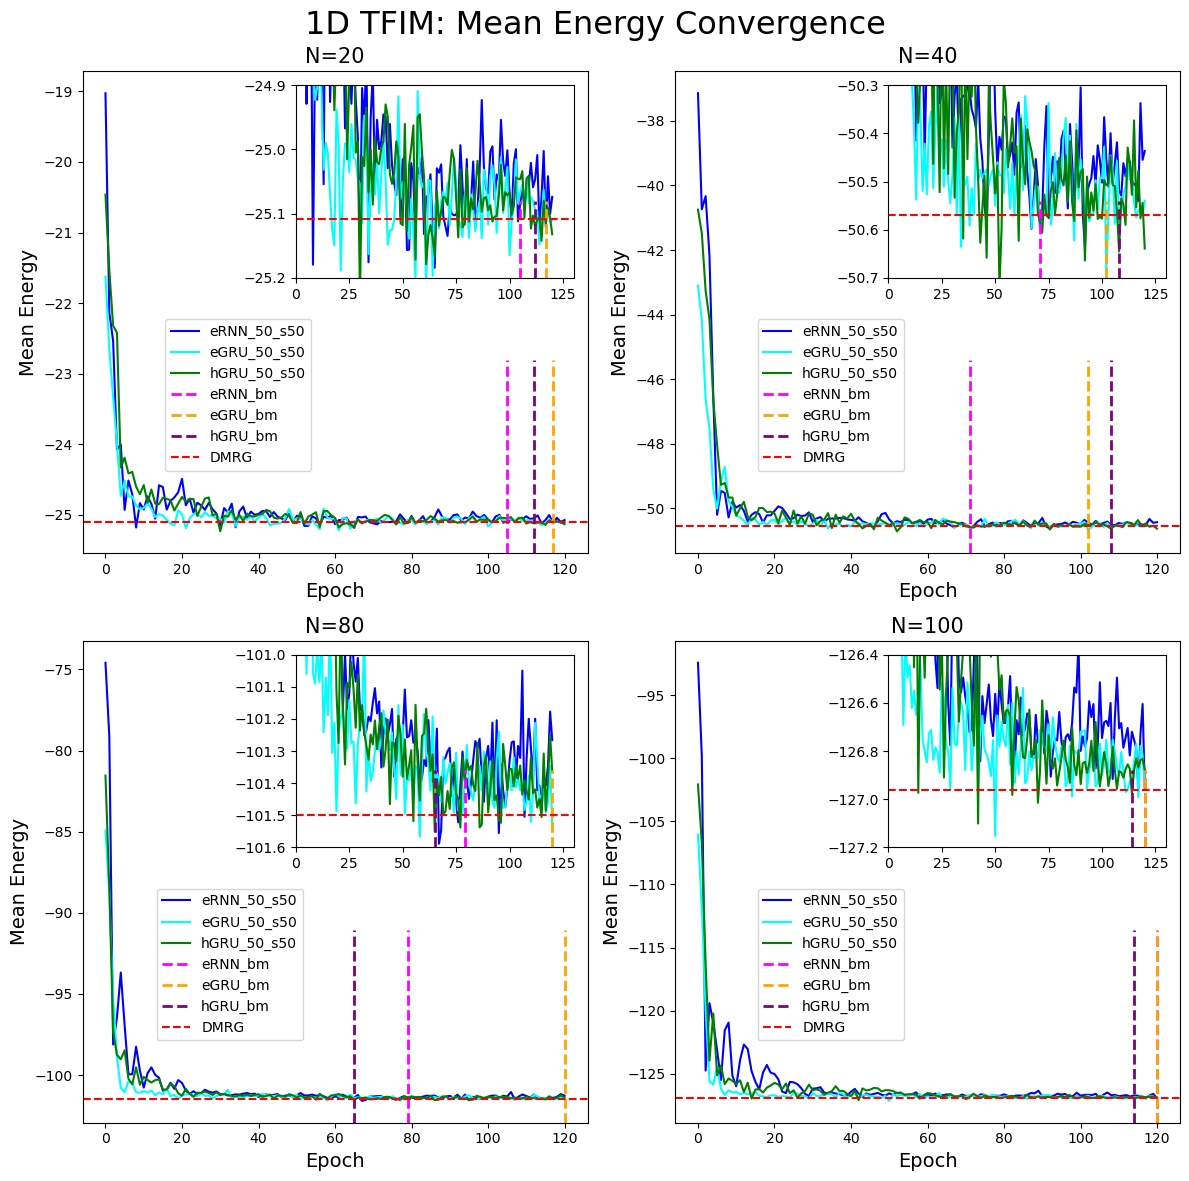

In [6]:
fig, ax = plt.subplots(2,2, figsize=(12, 12), tight_layout=True)
e_list20 = [mE_ernn, mE_egru,  mE_hgru]
e_list40 = [mE_ernn40, mE_egru40,  mE_hgru40]
e_list80 = [mE_ernn80, mE_egru80,  mE_hgru80]
e_list100 = [mE_ernn100, mE_egru100,  mE_hgru100]
e_names = ['eRNN_50_s50', 'eGRU_50_s50', 'hGRU_50_s50']
plot_res_meanE(ax[0,0], Ee_20, e_list20, bm[0], e_names, 20, [0,130, -25.2, -24.9], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[0,1], Ee_40, e_list40,bm[1], e_names, 40, [0,130, -50.7, -50.3], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[1,0], Ee_80, e_list80, bm[2],e_names, 80, [0,130, -101.6, -101.], (0.15, 0.3, 0.3, 0.2))
plot_res_meanE(ax[1,1], Ee_100, e_list100,bm[3], e_names, 100, [0,130, -127.2, -126.4], (0.15, 0.3, 0.8, 0.2))

plt.suptitle('1D TFIM: Mean Energy Convergence', fontsize = 23)
plt.savefig('1dTFIM_all_N_ns50_nu50.png')

/var/folders/cj/1sxs7wzx40l7609nvj0b33c40000gn/T/ipykernel_1687/2877978903.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('1dTFIM_all_N_ns50_nu50_var.png')


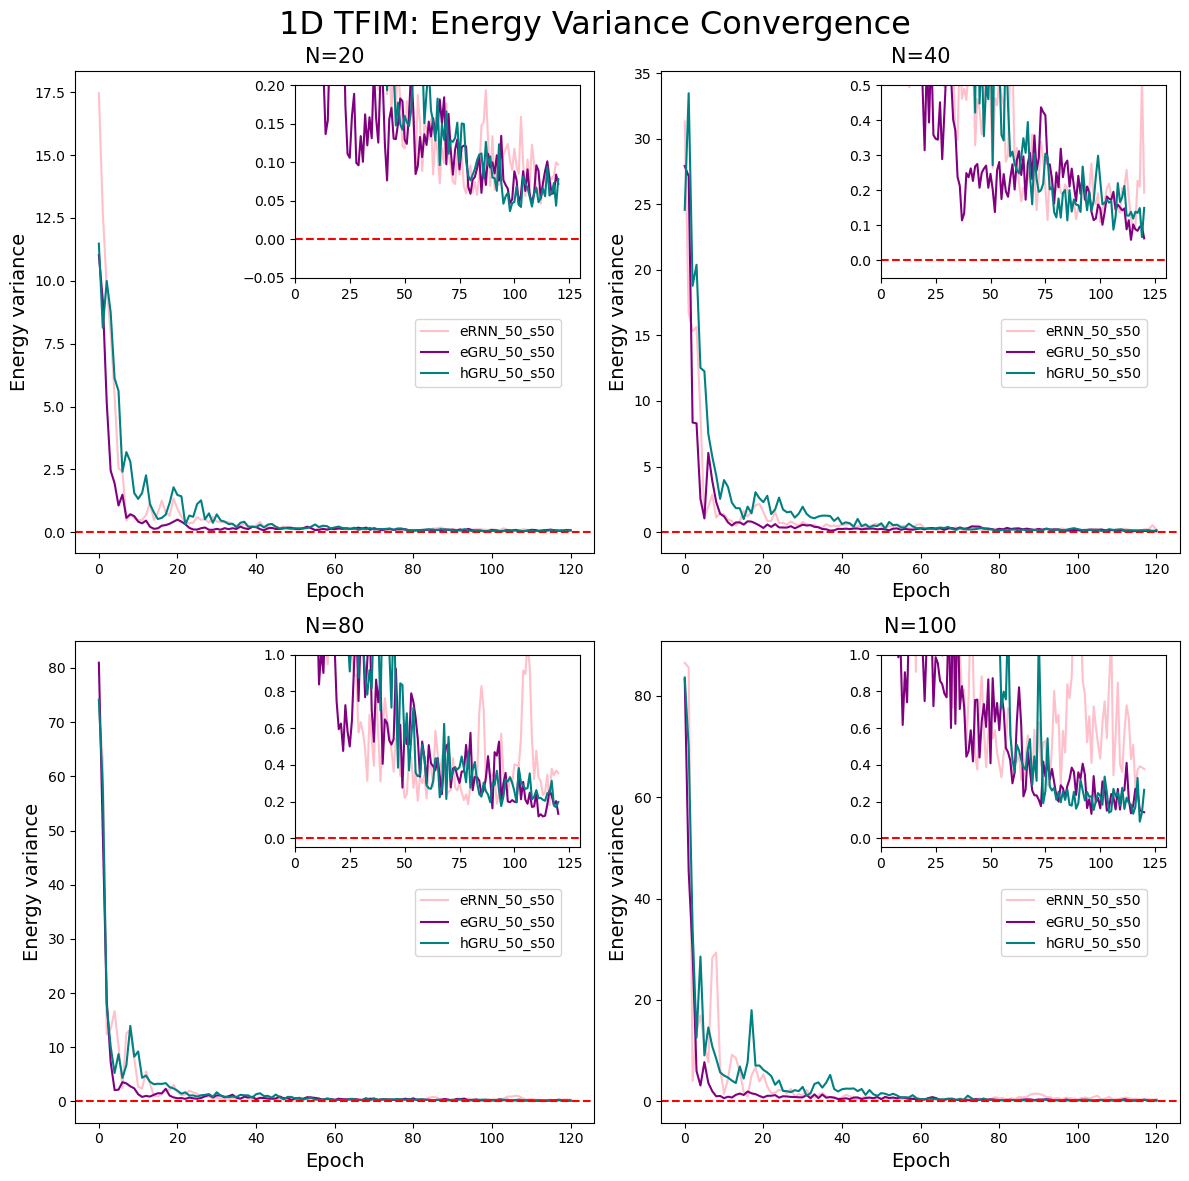

In [7]:
fig, ax = plt.subplots(2,2, figsize=(12, 12), tight_layout=True)
v_list20 = [vE_ernn, vE_egru,  vE_hgru]
v_list40 = [vE_ernn40, vE_egru40,  vE_hgru40]
v_list80 = [vE_ernn80, vE_egru80,  vE_hgru80]
v_list100 = [vE_ernn100, vE_egru100,  vE_hgru100]
plot_res_var(ax[0,0], v_list20, e_names, 20, [0,130, -0.05, 0.2],(0.15, 0.3, 0.8, 0.2))
plot_res_var(ax[0,1], v_list40, e_names, 40,[0,130, -0.05, 0.5],(0.15, 0.3, 0.8, 0.2))
plot_res_var(ax[1,0], v_list80, e_names, 80, [0,130, -0.05, 1.0],(0.15, 0.3, 0.8, 0.2))
plot_res_var(ax[1,1], v_list100, e_names, 100, [0,130, -0.05, 1.0], (0.15, 0.3, 0.8, 0.2))

plt.suptitle('1D TFIM: Energy Variance Convergence', fontsize = 23)
plt.savefig('1dTFIM_all_N_ns50_nu50_var.png')